<a href="https://colab.research.google.com/github/MiteshBhanushali/Credit-Card-Default/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [83]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
pip install --upgrade xlrd

In [85]:
#loading dataset
import xlrd
path='/content/drive/My Drive/CreditCardDefault/default of credit card clients.xls'
credit_data=pd.read_excel(path)

In [86]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [87]:
credit_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [88]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [89]:
credit_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [90]:
credit_data.isna().sum() #No missing values in dataset

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [91]:
column_list=credit_data.columns.tolist()
column_list

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

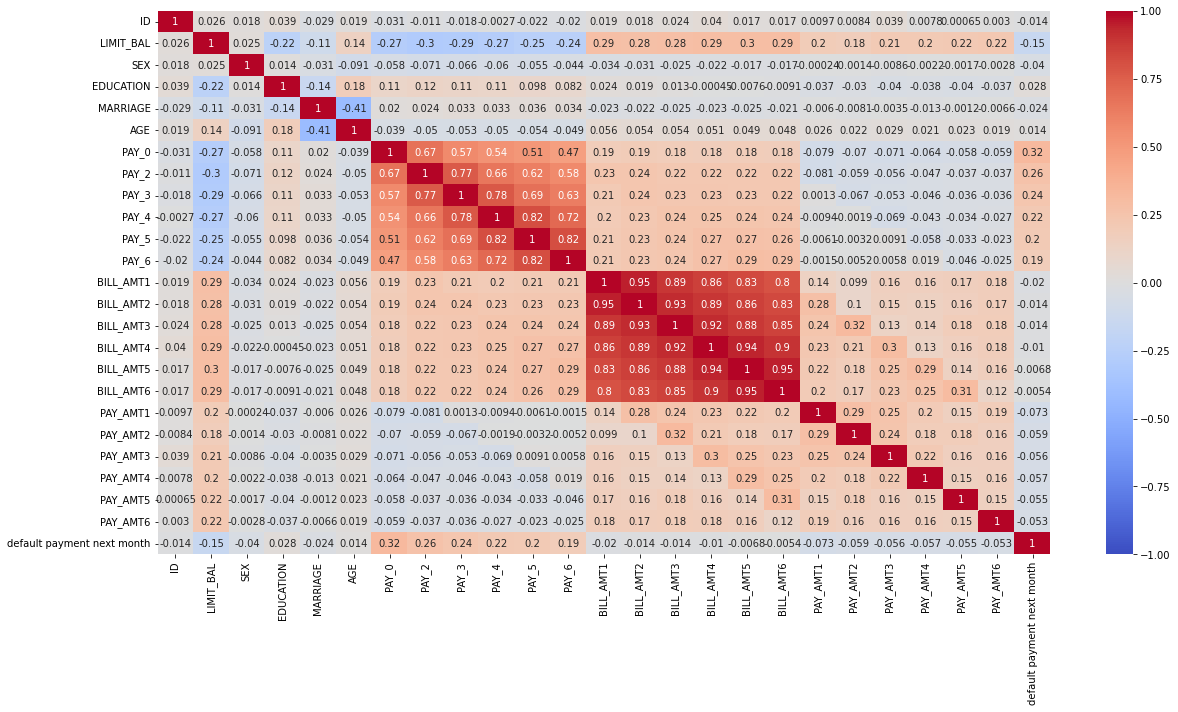

In [92]:
#correlation heat-map 
correlation_df=credit_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df,vmin=-1, cmap='coolwarm',annot=True)

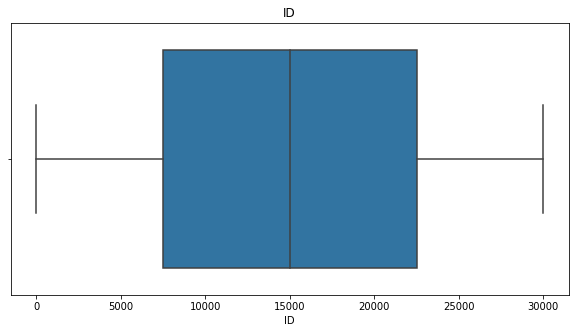

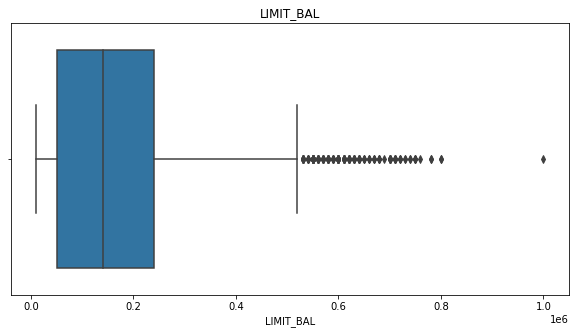

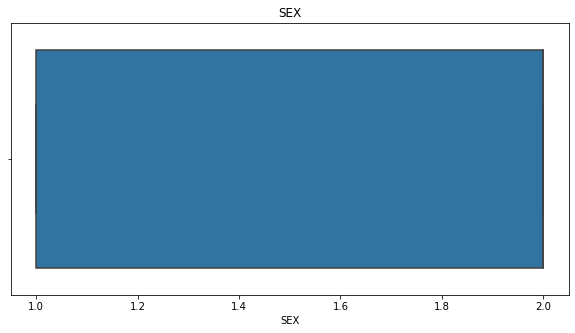

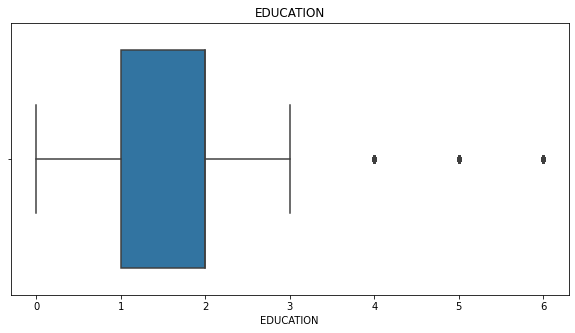

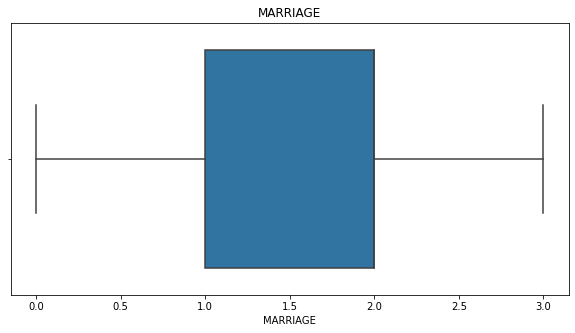

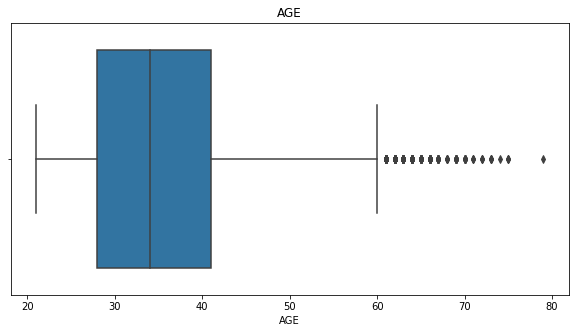

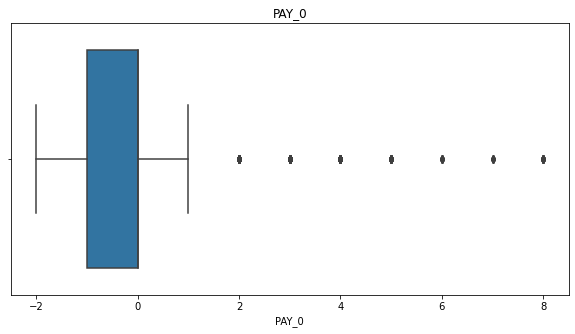

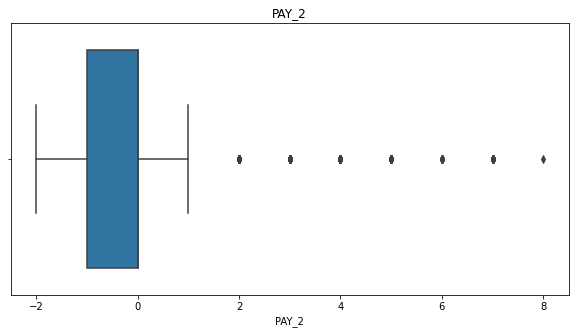

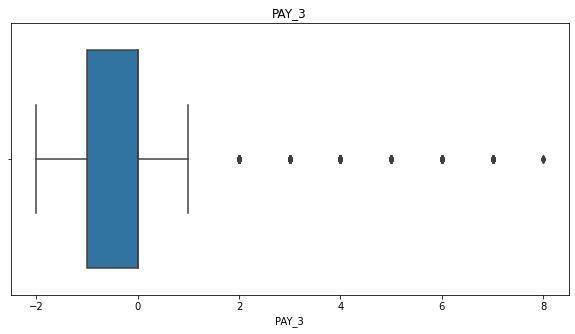

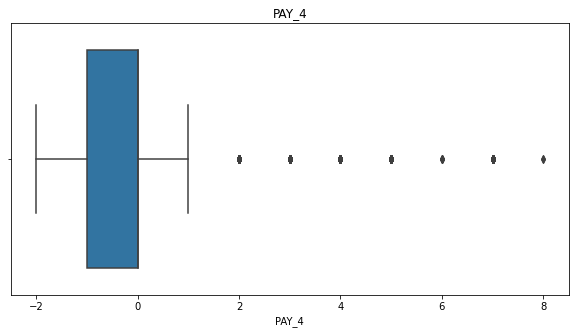

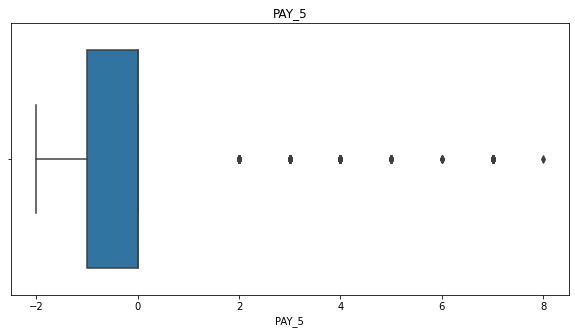

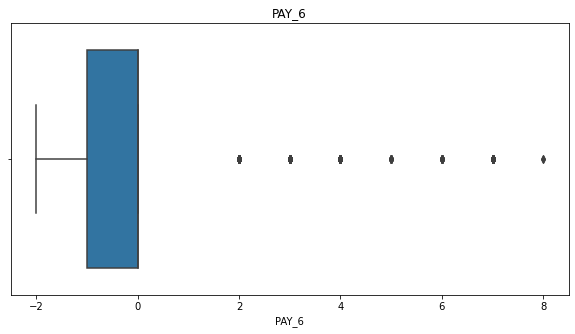

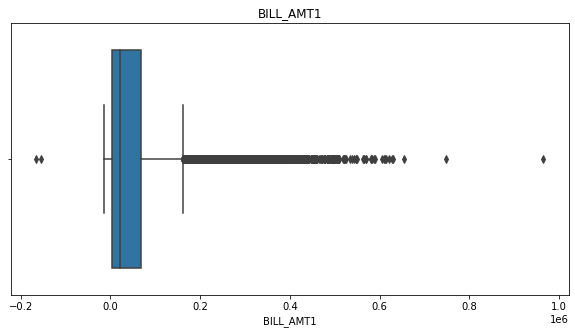

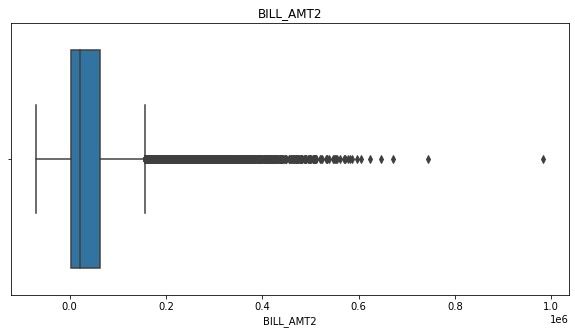

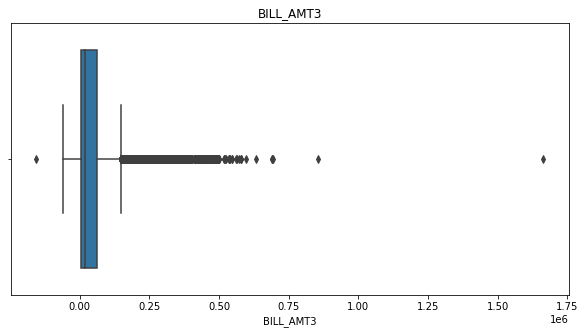

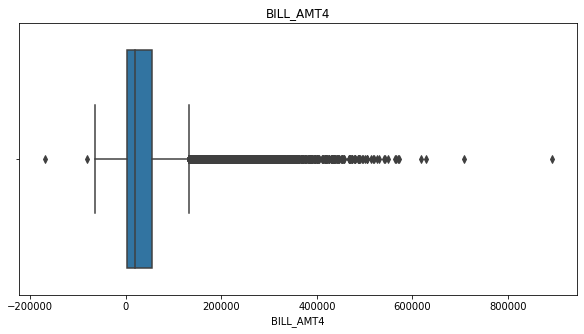

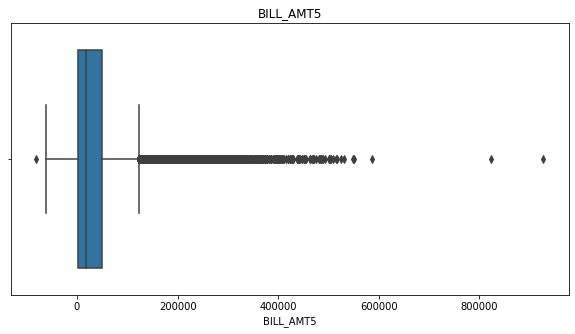

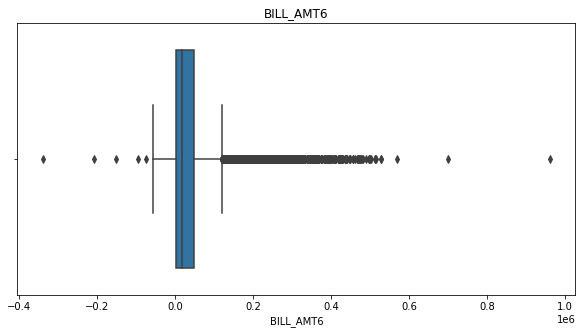

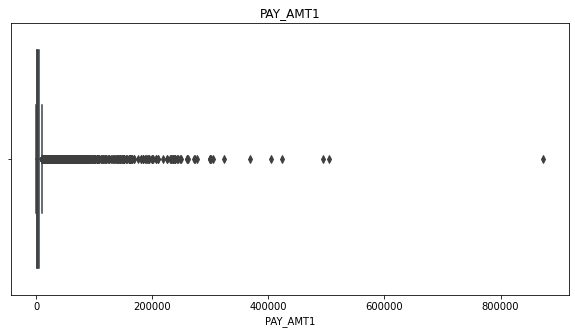

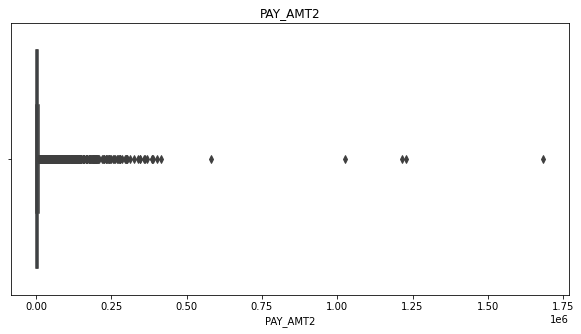

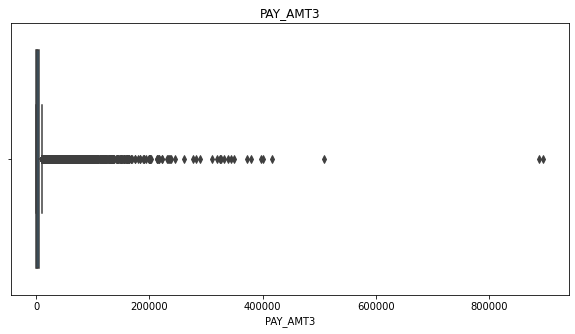

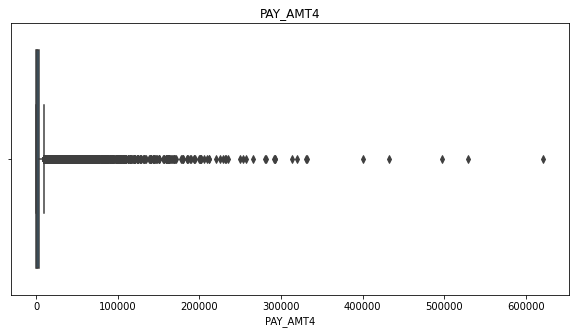

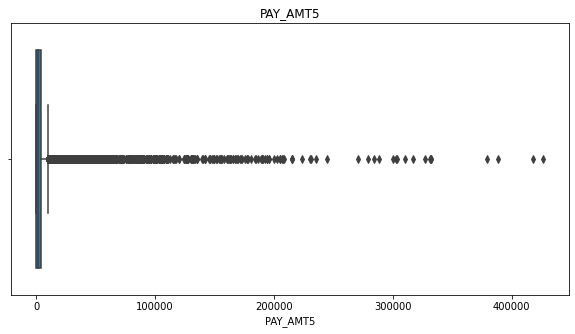

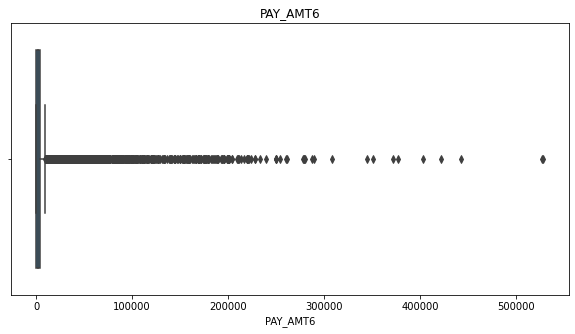

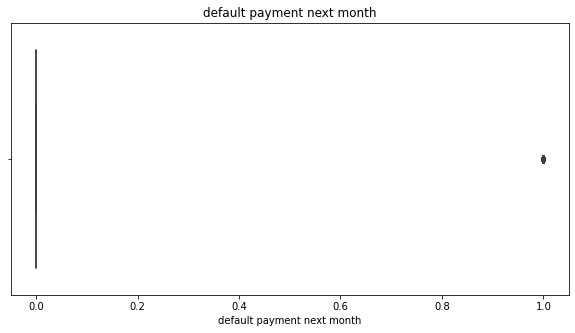

In [93]:
for i in column_list:
  plt.figure(figsize=(10,5))
  sns.boxplot(credit_data[i])
  plt.title(i)

Text(0.5, 1.0, 'Distribution of default payment next month column')

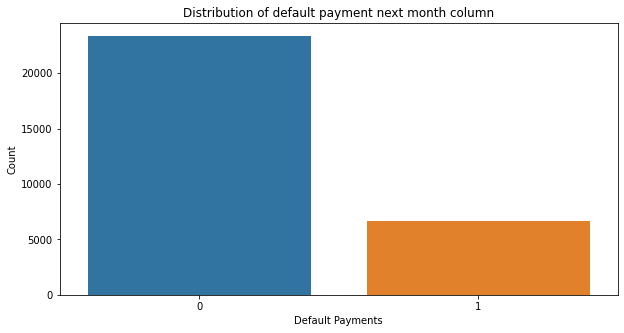

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x=credit_data['default payment next month'])
plt.xlabel("Default Payments")
plt.ylabel("Count")
plt.title("Distribution of default payment next month column")
#Class imbalance detected

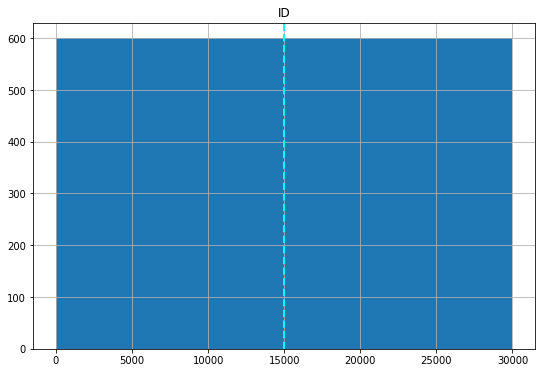

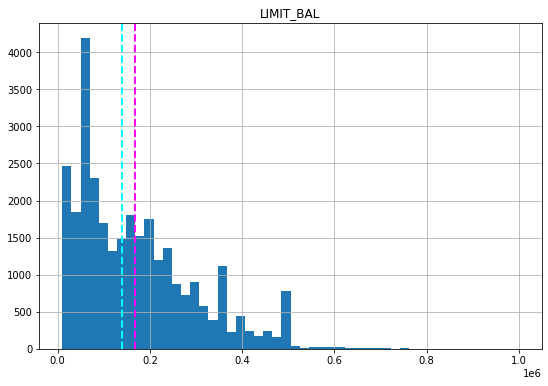

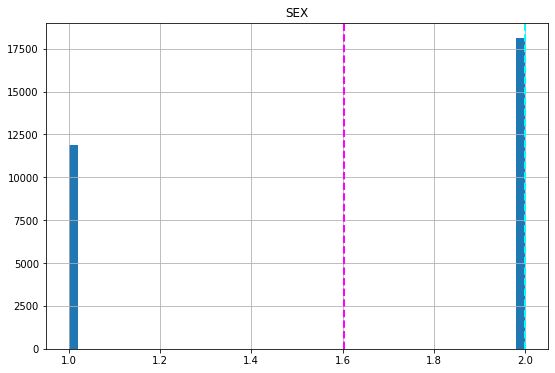

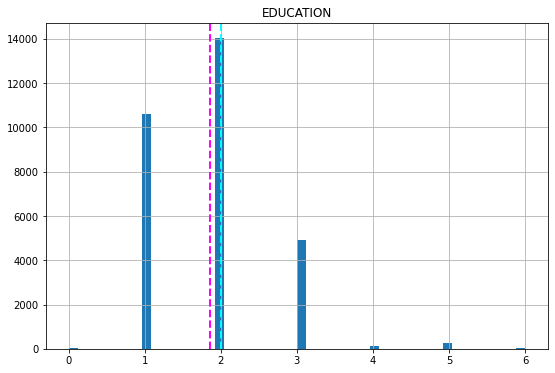

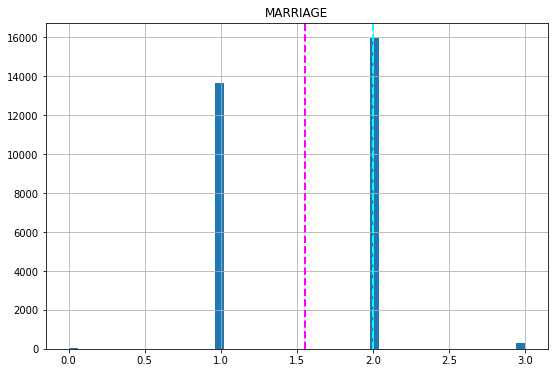

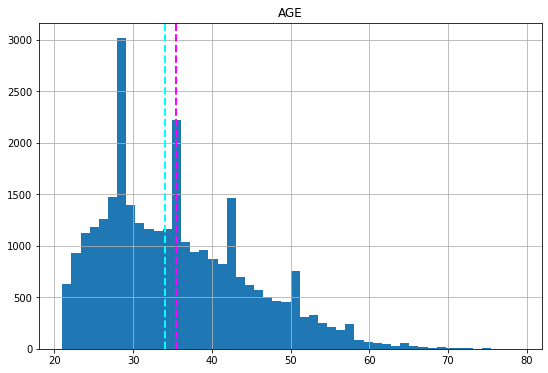

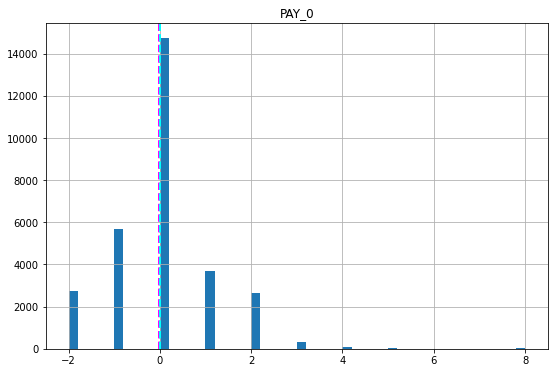

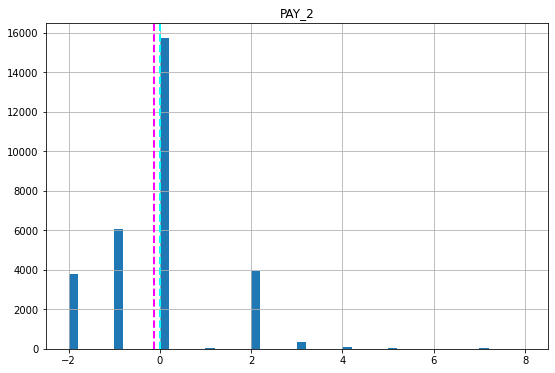

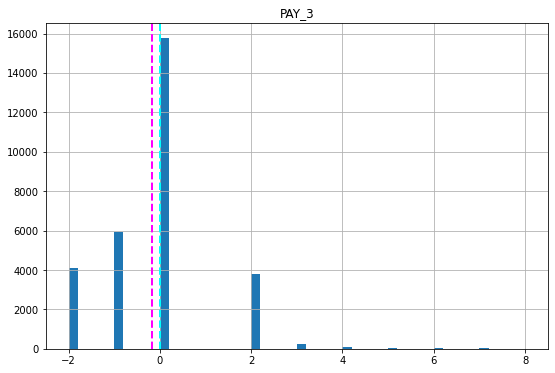

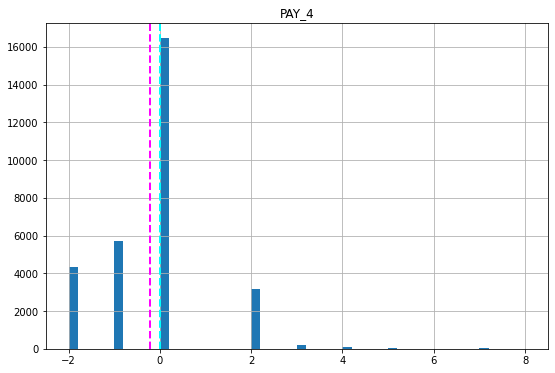

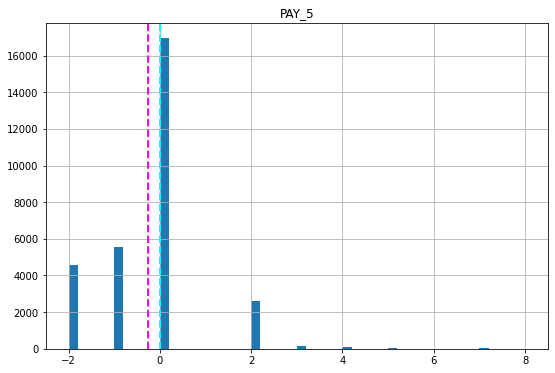

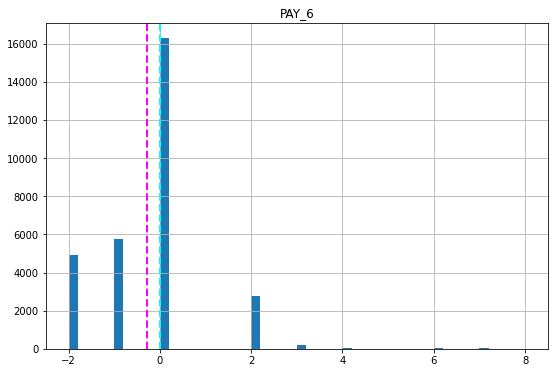

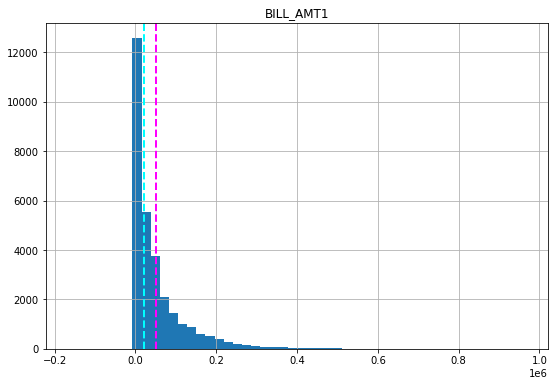

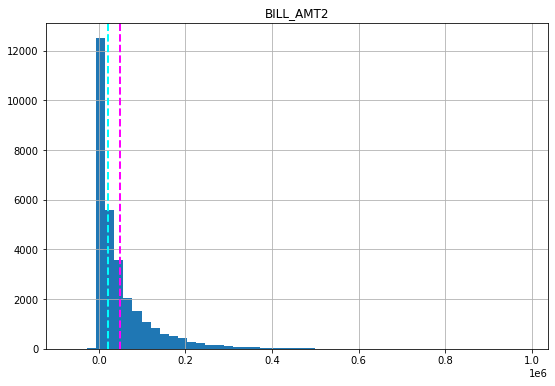

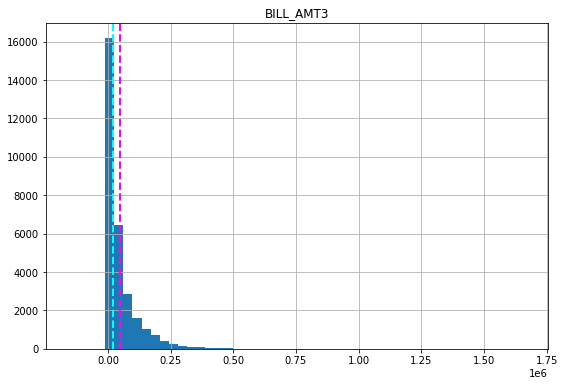

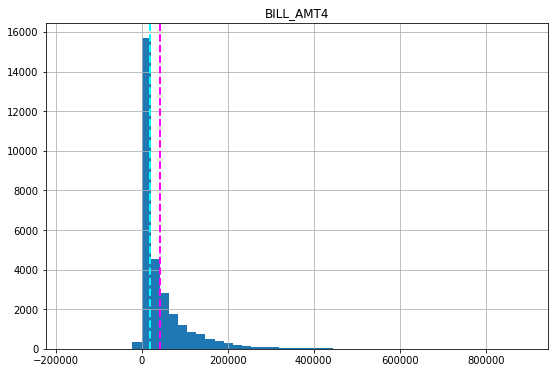

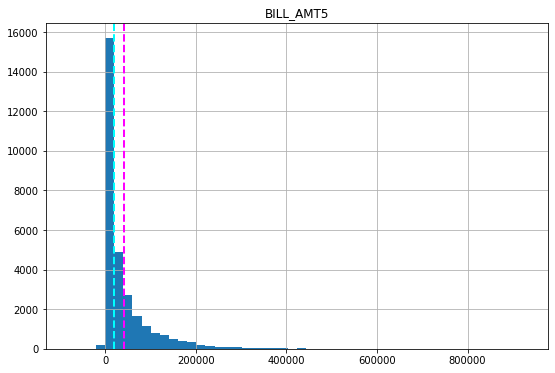

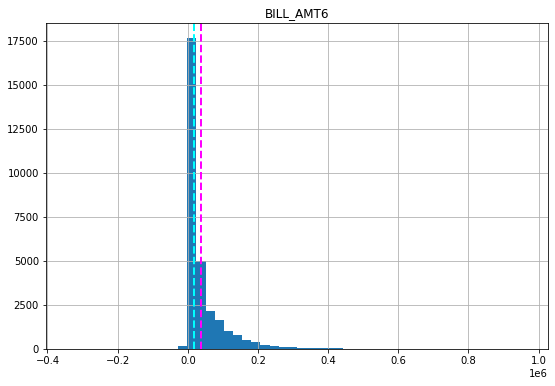

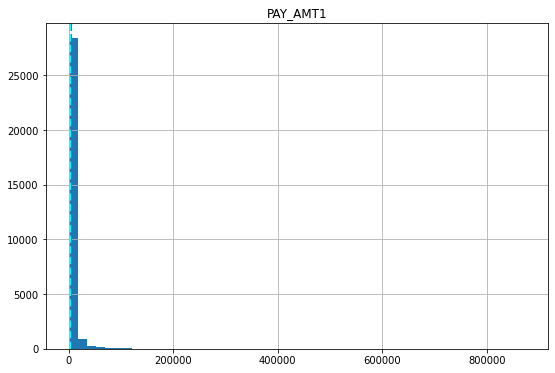

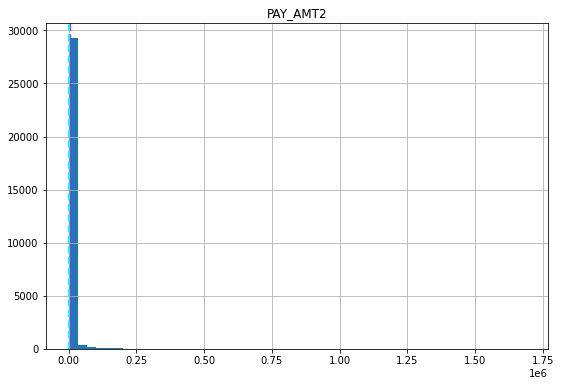

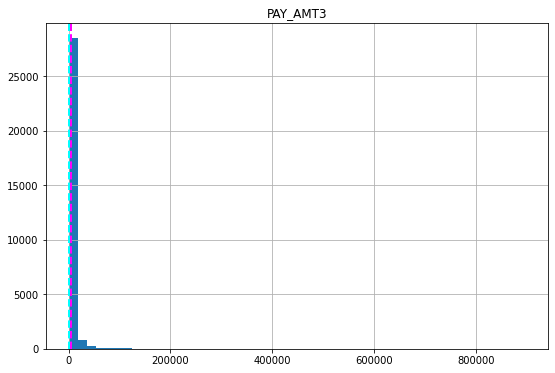

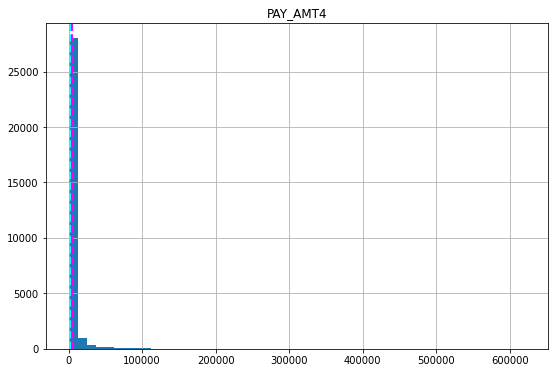

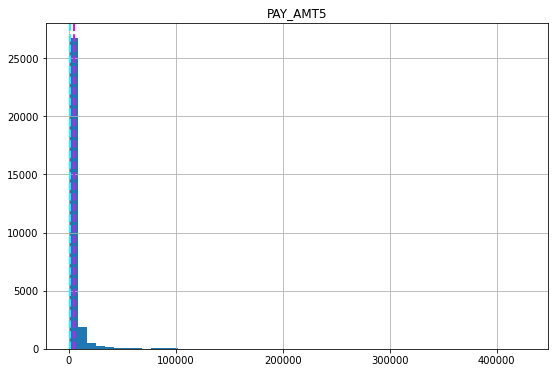

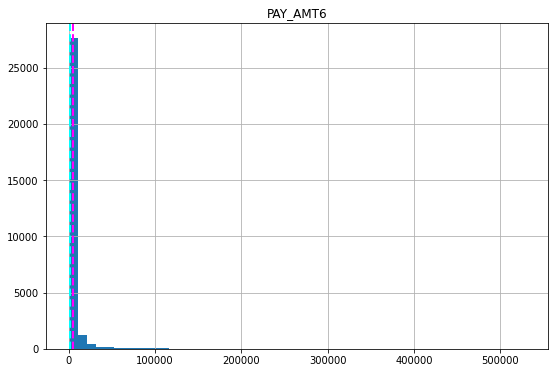

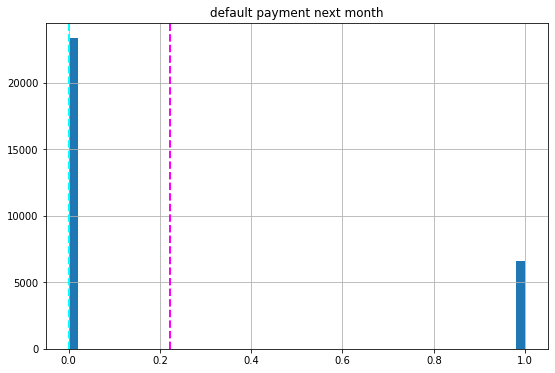

In [95]:
# plot a bar plot for each numerical feature count
for col in column_list[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = credit_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [96]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [97]:
calc_vif(credit_data[[i for i in credit_data.describe().columns if i not in ['default payment next month'] ]]).sort_values('VIF')

,variables,VIF
23,PAY_AMT6,1.270781
21,PAY_AMT4,1.807449
22,PAY_AMT5,1.854705
18,PAY_AMT1,1.907529
20,PAY_AMT3,1.911822
6,PAY_0,1.919145
19,PAY_AMT2,2.385527
7,PAY_2,3.212863
11,PAY_6,3.463893
8,PAY_3,3.728466


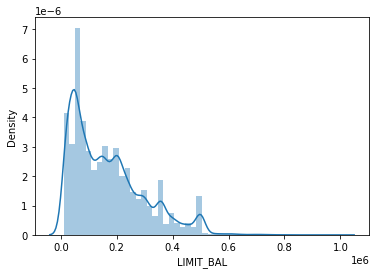

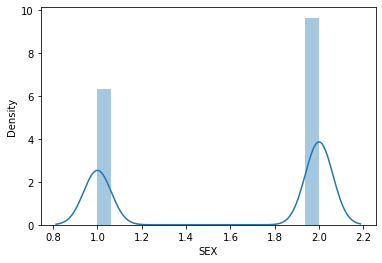

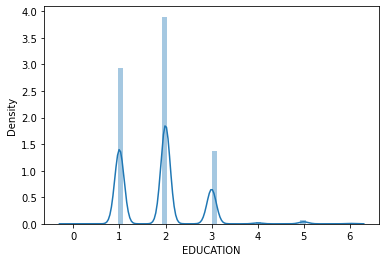

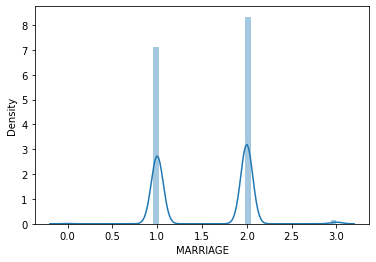

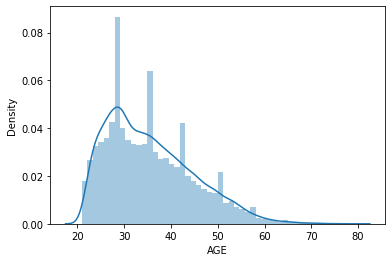

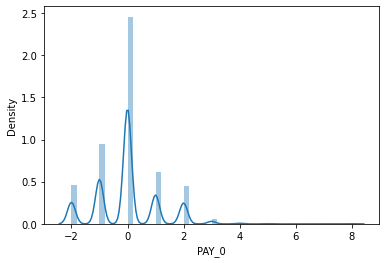

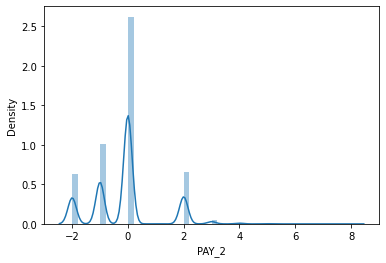

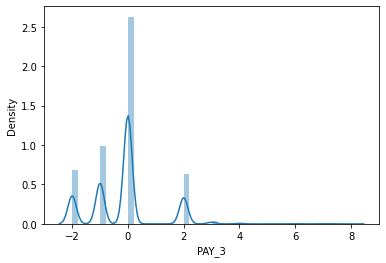

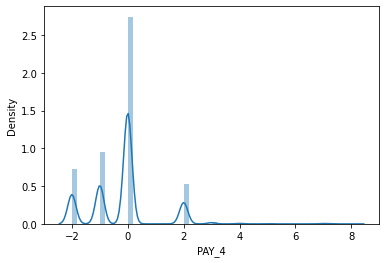

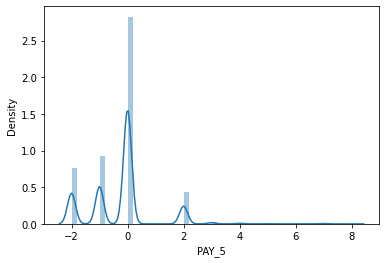

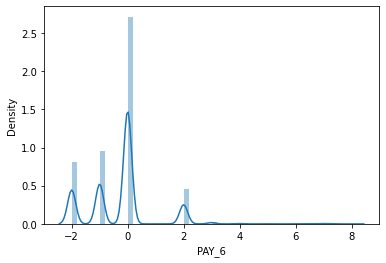

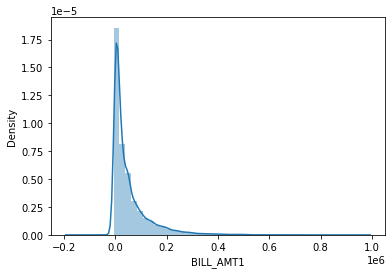

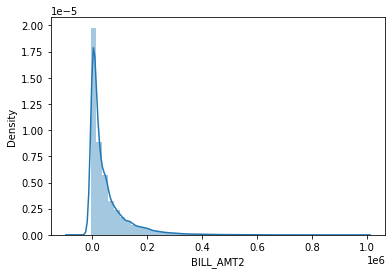

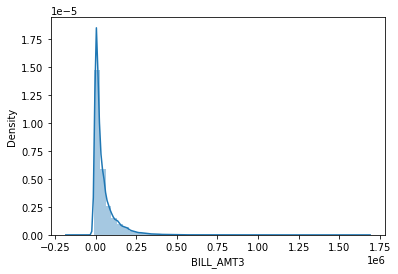

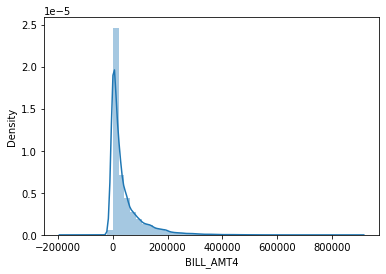

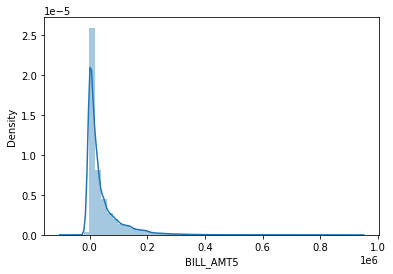

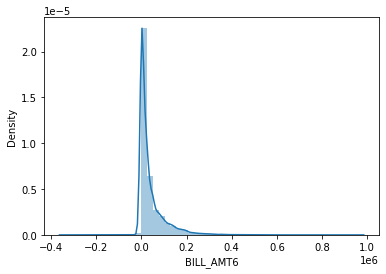

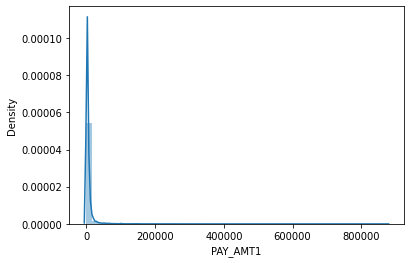

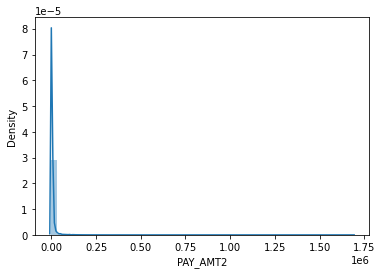

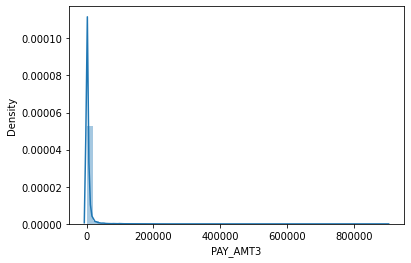

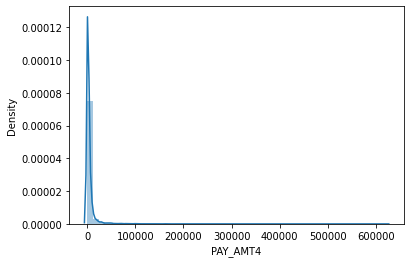

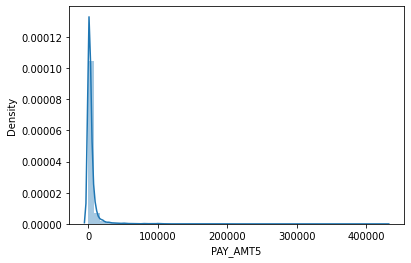

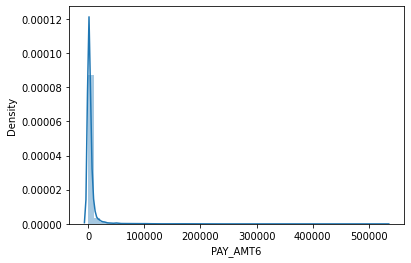

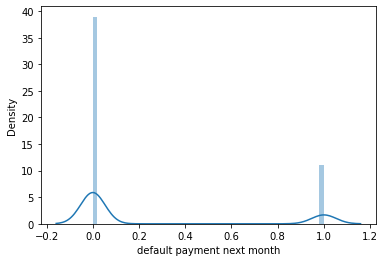

In [98]:
for i in column_list[1:]:
  sns.distplot(credit_data[i])
  plt.show()

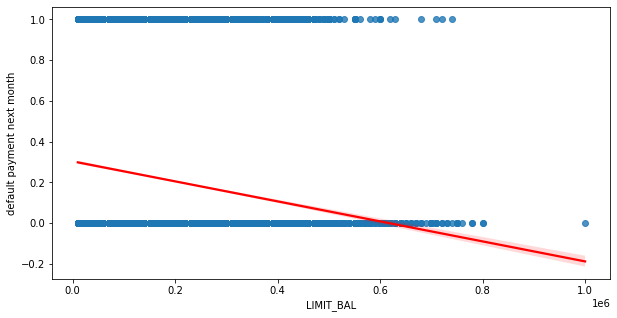

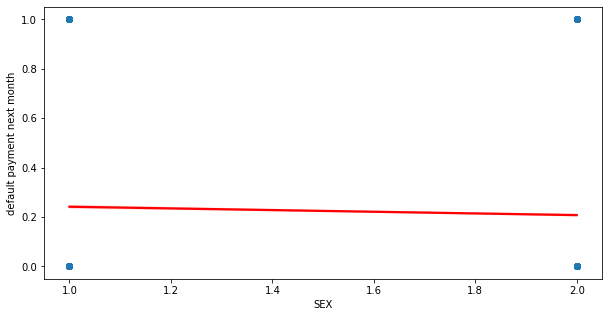

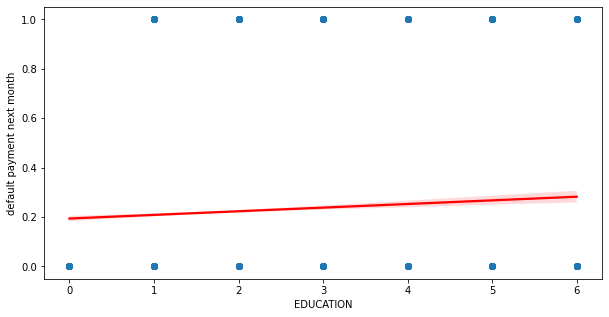

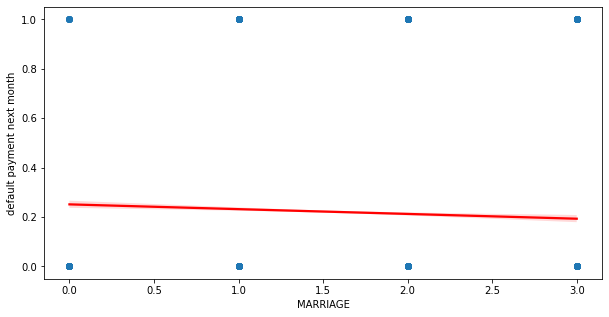

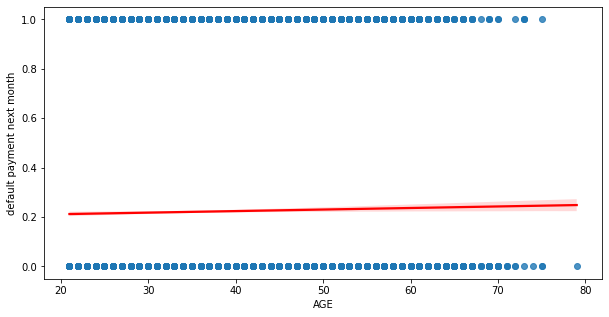

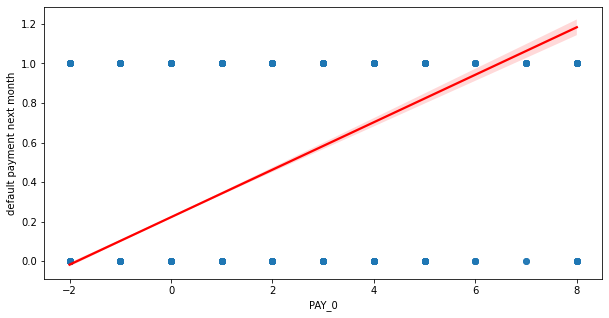

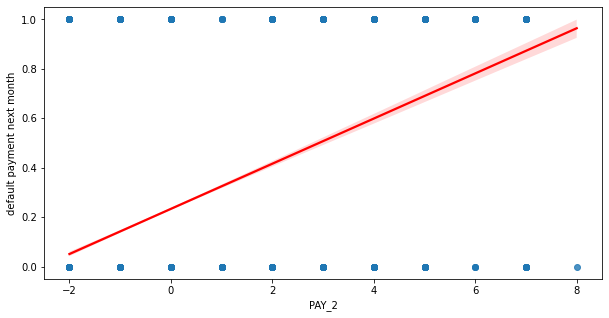

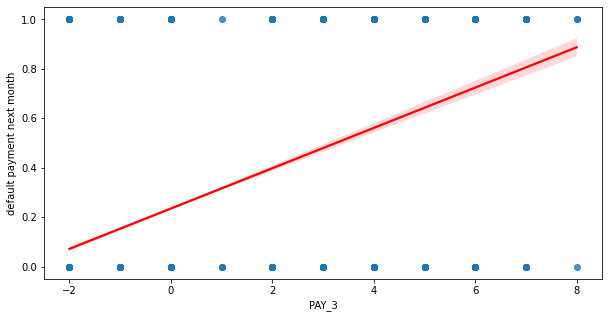

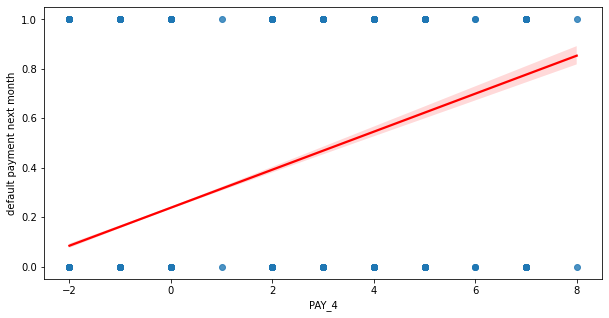

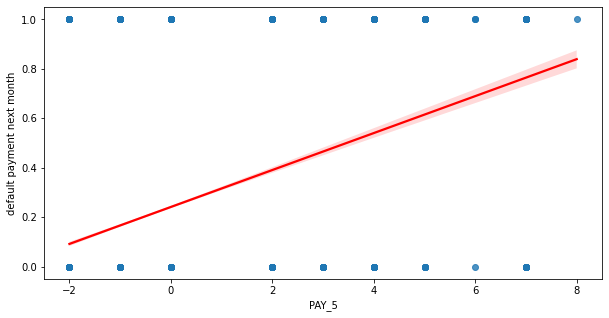

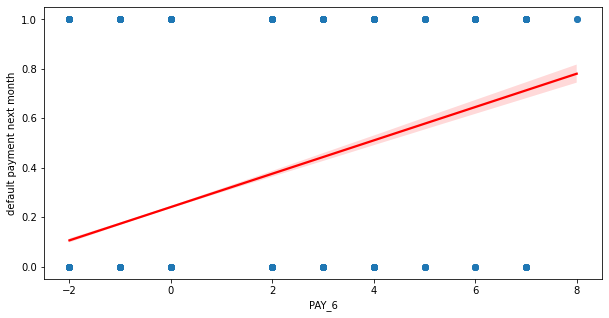

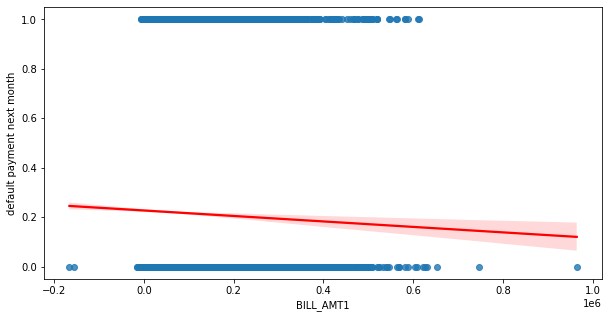

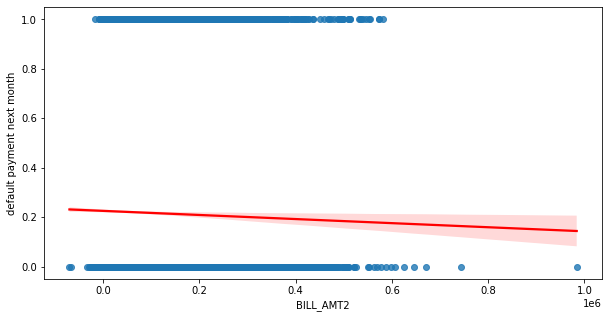

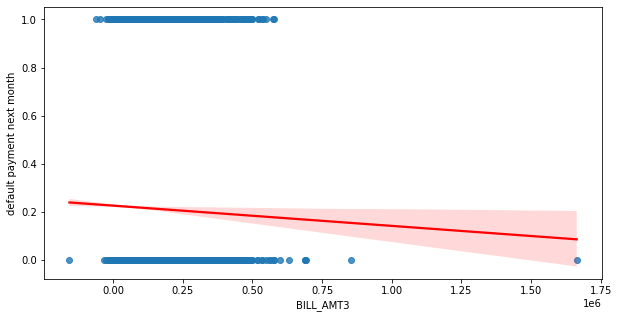

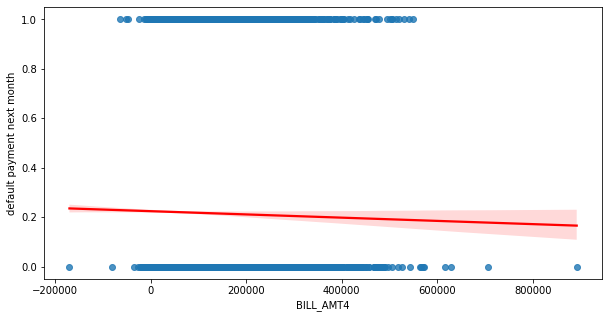

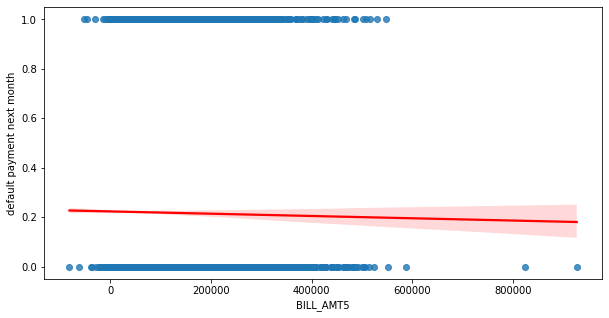

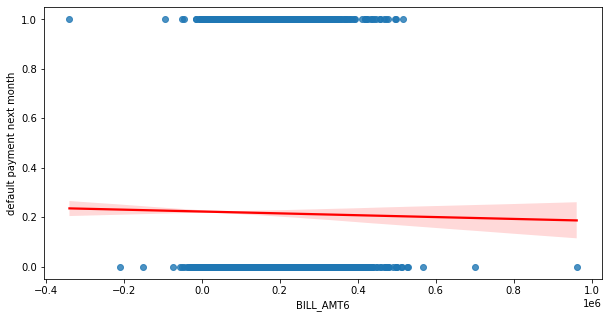

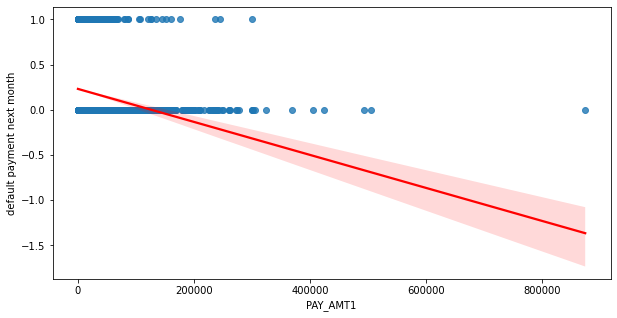

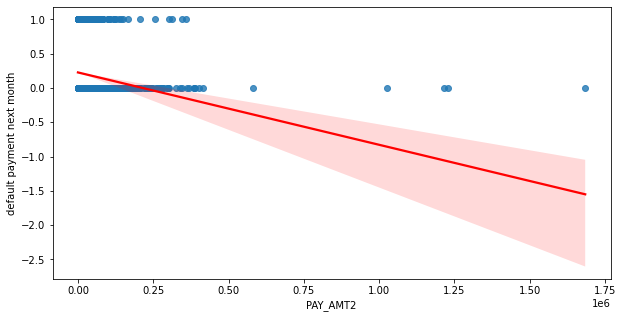

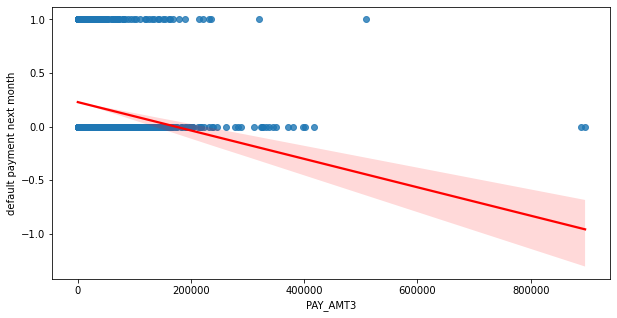

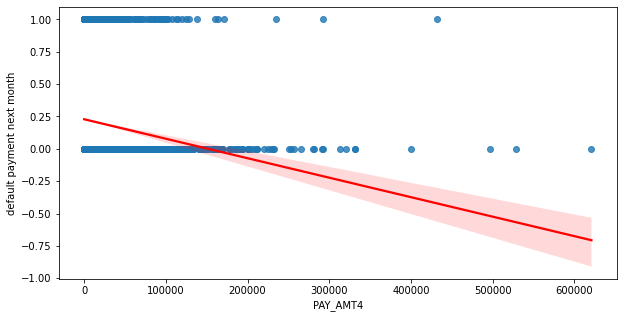

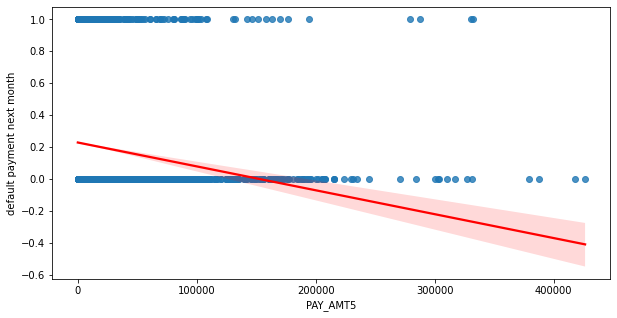

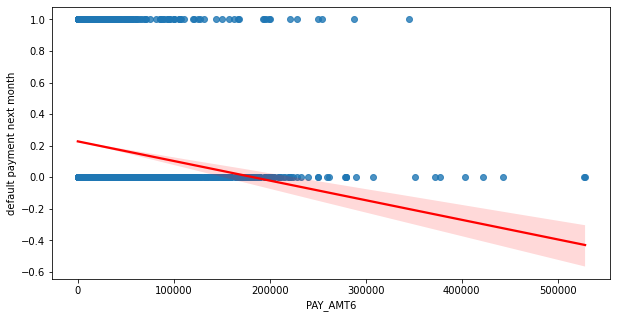

<Figure size 720x360 with 0 Axes>

In [99]:
# ploting Regression plot of each columns of dataset v/s default payment next month
for col in column_list[1:]:
  plt.figure(figsize=(10, 5))
  if col == 'default payment next month':
    pass
  else:
    sns.regplot(x=credit_data[col],y=credit_data["default payment next month"],line_kws={"color": "red"})
  
  plt.show()

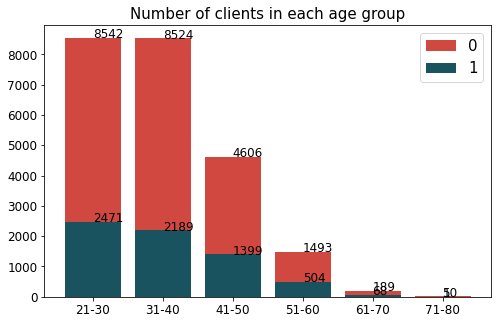

In [100]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_data['AGE_BIN'] = pd.cut(x=credit_data.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_data.AGE_BIN.value_counts()
age_0 = (credit_data.AGE_BIN[credit_data['default payment next month'] == 0].value_counts())
age_1 = (credit_data.AGE_BIN[credit_data['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))

plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [101]:
#We can see that as age increases the defaluters decreases

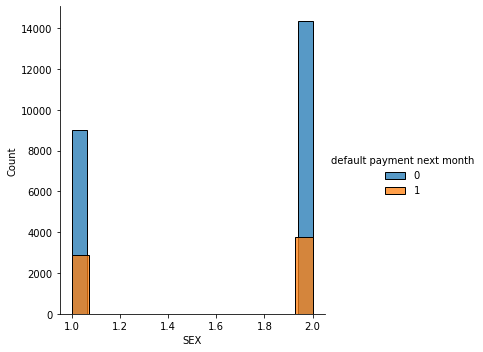

In [102]:
sns.FacetGrid(credit_data, hue = 'default payment next month', size = 5).map(sns.histplot, 'SEX').add_legend()

In [103]:
credit_data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [104]:
#Science pay can only take value from -1 to 9 so replacing it with -1
for att in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  filter = (credit_data[att] == -2) | (credit_data[att] == -1) 
  credit_data.loc[filter, att] = -1

In [105]:
credit_data['PAY_0'].value_counts()

 0    14737
-1     8445
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [106]:
credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [107]:
#replacing marriage=0 with 2(mode)
credit_data['MARRIAGE'].replace(0,2, inplace = True)

In [108]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [109]:
edu_condition =(credit_data['EDUCATION'] == 5) | (credit_data['EDUCATION'] == 6) | (credit_data['EDUCATION'] == 4)

In [110]:
#Replacing education 4,5,6 with 3
credit_data.loc[edu_condition, 'EDUCATION' ] = 3

In [111]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     5371
0       14
Name: EDUCATION, dtype: int64

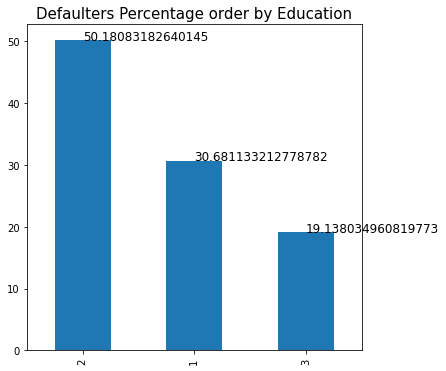

In [112]:
ax = credit_data[credit_data['default payment next month'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6))

plt.title("Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

university sutdent tendes to default more 

In [113]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BIN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [114]:
df_final = credit_data.drop(['AGE_BIN', 'ID'], axis = 1)

In [115]:
#Changing datatype of limit balance and age
df_final.LIMIT_BAL  = df_final.LIMIT_BAL.astype("int64")
df_final.AGE  = df_final.AGE.astype("int64")

In [182]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = df_final, drop_first = True)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,1,24,2,2,-1,-1,-1,-1,3913,...,689,0,0,0,0,1,1,0,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,0,1,0
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,0,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,0,1
29996,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,0,1
29997,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,0,1,0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,3409,1178,1926,52964,1804,1,0,0,0,1


Spliting Data in X and Y

In [183]:
X = df_final.drop(['default payment next month'],axis=1)
y = df_final['default payment next month']
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


SMOTE to handle class imblance

In [184]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_sm, y_sm = smote.fit_resample(X, y)

print('Original dataset shape', len(df_final))
print('Resampled dataset shape', len(y_sm))

Original dataset shape 30000
Resampled dataset shape 46728


In [185]:
from collections import Counter
counter = Counter(y_sm)
counter

Counter({0: 23364, 1: 23364})

Train-Test Split and Standarization of X

In [186]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size = 0.3, random_state = 42,stratify = y_sm)

In [187]:
num_column=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [188]:
from sklearn.preprocessing import StandardScaler
for i in num_column:
  scl = StandardScaler().fit(x_train_sm[[i]])     # fit on training data columns
  x_train_sm[i] = scl.transform(x_train_sm[[i]]) # transform the training data columns
  x_test_sm[i] = scl.transform(x_test_sm[[i]])   # transform the testing data columns

Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [190]:
def print_accuracy(model,x_train,x_test,y_train,y_test):
  #Fitting the model
  model.fit(x_train, y_train)
  # Get the predicted classes
  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)
  # Get the accuracy scores
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)
  print('-------------------------------------------------')
  roc_train=roc_auc_score(y_train,train_class_preds)
  roc_test=roc_auc_score(y_test,test_class_preds)
  print("The roc auc on train data is ", roc_train)
  print("The roc auc on test data is ", roc_test)
  print('-------------------------------------------------')
  print('Confusion Matrix for train is :')
  cm1 = confusion_matrix(y_train, train_class_preds)
  print(cm1)
  print('Confusion Matrix for test is :')
  cm = confusion_matrix(y_test, test_class_preds)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  labels = ['Retained', 'Churned']
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

The accuracy on train data is  0.7239597664251429
The accuracy on test data is  0.7238034096583208
-------------------------------------------------
The roc auc on train data is  0.7239601465840969
The roc auc on test data is  0.7238029808424423
-------------------------------------------------
Confusion Matrix for train is :
[[12043  4311]
 [ 4718 11637]]
Confusion Matrix for test is :
[[5116 1894]
 [1978 5031]]


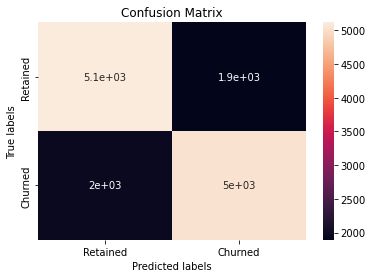

In [191]:
print_accuracy(clf,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [192]:
#Logistical regresion test prediction
#5116 where class 0 and where predicted 0, 1894 where class 0 but predicted 1, 1978 where class 1 but predicted as 0, 5031 where class 1 and predicted as 1
#The accuracy on test data is  0.7238034096583208

Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

The accuracy on train data is  0.7129841939527347
The accuracy on test data is  0.7093230615593124
-------------------------------------------------
The roc auc on train data is  0.7129852648339531
The roc auc on test data is  0.7093210502331525
-------------------------------------------------
Confusion Matrix for train is :
[[12233  4121]
 [ 5267 11088]]
Confusion Matrix for test is :
[[5170 1840]
 [2235 4774]]


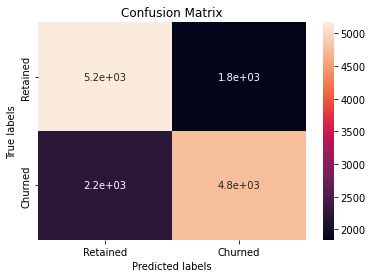

In [194]:
print_accuracy(dt,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [195]:
#DT test prediction
#5170 where class 0 and where predicted 0, 1840 where class 0 but predicted 1, 2235 where class 1 but predicted as 0, 4774 where class 1 and predicted as 1
#The accuracy on test data is 0.7093230615593124

Random Forest with CV

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[40,50, 80,100,120], 'max_depth':[3, 5, 7,9,11]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

The accuracy on train data is  0.8406554770858173
The accuracy on test data is  0.793851201940224
-------------------------------------------------
The roc auc on train data is  0.8406566995054056
The roc auc on test data is  0.7938483413113241
-------------------------------------------------
Confusion Matrix for train is :
[[14402  1952]
 [ 3260 13095]]
Confusion Matrix for test is :
[[5846 1164]
 [1726 5283]]


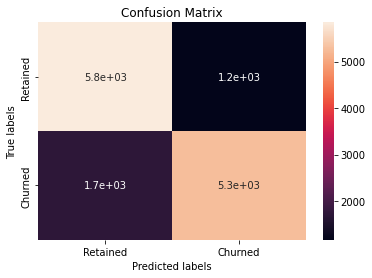

In [197]:
print_accuracy(classifier,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [198]:
#Random Forest test prediction
#5846 where class 0 and where predicted 0, 1164 where class 0 but predicted 1,1726 where class 1 but predicted as 0,5283 where class 1 and predicted as 1
#The accuracy on test data is  0.793851201940224

KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

The accuracy on train data is  0.8023785502461096
The accuracy on test data is  0.7647478422141379
-------------------------------------------------
The roc auc on train data is  0.8023784603315957
The roc auc on test data is  0.7647477392527114
-------------------------------------------------
Confusion Matrix for train is :
[[13074  3280]
 [ 3184 13171]]
Confusion Matrix for test is :
[[5371 1639]
 [1659 5350]]


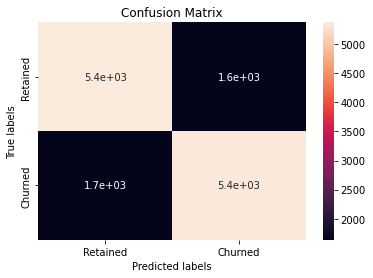

In [200]:
print_accuracy(classifier_knn,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [201]:
#KNN test prediction
#5371 where class 0 and where predicted 0, 1639 where class 0 but predicted 1, 1659 where class 1 but predicted as 0, 5350 where class 1 and predicted as 1
#The accuracy on test data is  0.7647478422141379

XGBoost using GridSearchCV

In [211]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (7, 11, 1),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

Fitting 2 folds for each of 36 candidates, totalling 72 fits
The accuracy on train data is  0.9714757406218472
The accuracy on test data is  0.8409301662030102
-------------------------------------------------
The roc auc on train data is  0.971476094840959
The roc auc on test data is  0.8409285778688049
-------------------------------------------------
Confusion Matrix for train is :
[[16077   277]
 [  656 15699]]
Confusion Matrix for test is :
[[6051  959]
 [1271 5738]]


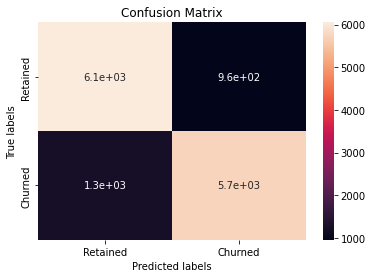

In [212]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 2,
    verbose=True
)
print_accuracy(grid_search,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [ ]:
#XGBoost test prediction
#6051 where class 0 and where predicted 0, 959 where class 0 but predicted 1, 1271 where class 1 but predicted as 0, 5738 where class 1 and predicted as 1
#The accuracy on test data is  0.8409301662030102

SVM using GridSearchCV

In [218]:
from sklearn.svm import SVC
svc=SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 100],
              'gamma': [ 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
grid = GridSearchCV(svc, param_grid,refit = True,scoring = 'roc_auc', verbose = 3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=  51.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=  51.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=  50.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=  50.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=  51.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=  51.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.808 total time=  51.8s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.798 total time=  52.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.803 total time=  51.6s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.812 total time=  52.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.775 total time=  58.6s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

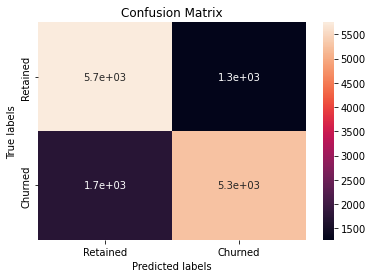

In [219]:
print_accuracy(grid,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [ ]:
svc1=SVC(kernel='linear', C=1E10)
print_accuracy(svc1,x_train_sm,x_test_sm,y_train_sm,y_test_sm)